In [12]:
import load_data
x_data, y_data, x_valid, y_valid = load_data.load_cicids_2017_q()

print(len(x_data))
print(len(y_data))
print(len(x_valid))
print(len(y_valid))

14
14
12786
12786


In [13]:
from collections import Counter

for i in range(len(y_data)):
    print(Counter(y_data[i]))

Counter({2: 9000, 0: 9000})
Counter({4: 9000, 0: 9000})
Counter({3: 9000, 0: 9000})
Counter({10: 9000, 0: 9000})
Counter({0: 5337, 7: 5337})
Counter({6: 4846, 0: 4846})
Counter({5: 4705, 0: 4705})
Counter({0: 1323, 12: 1323})
Counter({0: 2897, 11: 2897})
Counter({0: 1753, 1: 1753})
Counter({0: 586, 14: 586})
Counter({0: 32, 9: 32})
Counter({0: 18, 13: 18})
Counter({8: 9, 0: 9})


In [18]:
from collections import Counter

# Sample counters for each client
client_counters = [
    Counter({2: 9000, 0: 9000}),
    Counter({4: 9000, 0: 9000}),
    Counter({3: 9000, 0: 9000}),
    Counter({10: 9000, 0: 9000}),
    Counter({0: 5337, 7: 5337}),
    Counter({6: 4846, 0: 4846}),
    Counter({5: 4705, 0: 4705}),
    Counter({0: 1323, 12: 1323}),
    Counter({0: 2897, 11: 2897}),
    Counter({0: 1753, 1: 1753}),
    Counter({0: 586, 14: 586}),
    Counter({0: 32, 9: 32}),
    Counter({0: 18, 13: 18}),
    Counter({8: 9, 0: 9})
]

# Calculate total number of samples across all clients
total_samples = sum(sum(counter.values()) for counter in client_counters)

# Calculate coefficient weights for each client
coefficient_weights = []

for counter in client_counters:
    client_samples = sum(counter.values())
    coeff_weight = total_samples / client_samples
    coefficient_weights.append(coeff_weight)

# Display the coefficient weights
# for i, weight in enumerate(coefficient_weights, 1):
#     print(f"coeff_weights[{i}] = {weight:.6f}")

print(coefficient_weights)

[0.15650540813132544, 0.15650540813132544, 0.15650540813132544, 0.15650540813132544, 0.09280770702187598, 0.08426946753382256, 0.08181754947309845, 0.02300629499530484, 0.05037735192849442, 0.03048377560602372, 0.010190241018328522, 0.0005564636733558238, 0.00031301081626265085, 0.00015650540813132543]


In [28]:
import numpy as np
from collections import Counter


# Sample counters for each client
client_counters = [
    Counter({2: 9000, 0: 9000}),
    Counter({4: 9000, 0: 9000}),
    Counter({3: 9000, 0: 9000}),
    Counter({10: 9000, 0: 9000}),
    Counter({0: 5337, 7: 5337}),
    Counter({6: 4846, 0: 4846}),
    Counter({5: 4705, 0: 4705}),
    Counter({0: 1323, 12: 1323}),
    Counter({0: 2897, 11: 2897}),
    Counter({0: 1753, 1: 1753}),
    Counter({0: 586, 14: 586}),
    Counter({0: 32, 9: 32}),
    Counter({0: 18, 13: 18}),
    Counter({8: 9, 0: 9})
]

# Calculate total number of samples across all clients
total_samples = sum(sum(counter.values()) for counter in client_counters)

# Calculate raw coefficient weights (total_samples / client_samples)
raw_coeff_weights = [
    total_samples / sum(counter.values()) for counter in client_counters
]

# Calculate softmax normalized coefficient weights
tot_w = sum(raw_coeff_weights)
normalized_coeff_weights = [weight/tot_w for weight in raw_coeff_weights]

print(normalized_coeff_weights)

[0.0005491161914100519, 0.0005491161914100519, 0.0005491161914100519, 0.0005491161914100519, 0.0009259969501012678, 0.0010198195878436786, 0.0010503816626334678, 0.003735484295306475, 0.0017059184406939822, 0.0028191932245809847, 0.008433525124045164, 0.1544389288340771, 0.27455809570502593, 0.5491161914100519]


In [7]:
Counter(y_valid)

Counter({0: 6391,
         2: 1000,
         4: 1000,
         3: 1000,
         10: 1000,
         7: 594,
         6: 539,
         5: 523,
         11: 322,
         1: 195,
         12: 147,
         14: 66,
         9: 4,
         13: 3,
         8: 2})

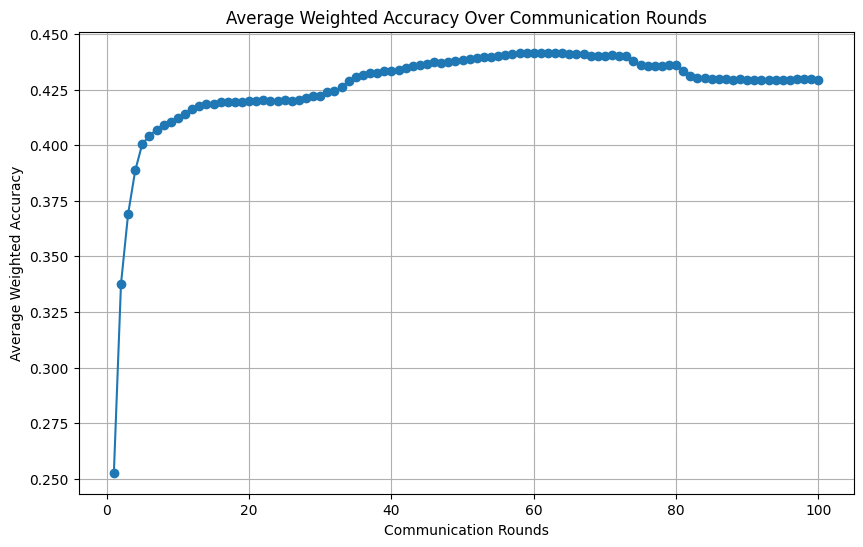

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the accuracy per class over rounds
accuracy_per_class_over_rounds = np.load("accuracy_per_class_over_rounds.npy")

# Class distribution from the Counter
class_distribution = {
    0: 6391,
    2: 1000,
    4: 1000,
    3: 1000,
    10: 1000,
    7: 594,
    6: 539,
    5: 523,
    11: 322,
    1: 195,
    12: 147,
    14: 66,
    9: 4,
    13: 3,
    8: 2
}

# Calculate the total number of samples
total_samples = sum(class_distribution.values())

# Calculate the weights for each class
class_weights = {cls: count / total_samples for cls, count in class_distribution.items()}

# Initialize an array to store the average weighted accuracy for each round
avg_weighted_accuracies = []

# Calculate the weighted accuracy for each round
for round_idx in range(accuracy_per_class_over_rounds.shape[0]):
    accuracy_current_round = accuracy_per_class_over_rounds[round_idx]
    weighted_accuracy = sum(accuracy_current_round[cls] * class_weights[cls] for cls in class_distribution)
    avg_weighted_accuracies.append(weighted_accuracy)

# Convert to numpy array for easier plotting
avg_weighted_accuracies = np.array(avg_weighted_accuracies)

# Plot the average weighted accuracies over rounds
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(avg_weighted_accuracies) + 1), avg_weighted_accuracies, marker='o')
plt.xlabel('Communication Rounds')
plt.ylabel('Average Weighted Accuracy')
plt.title('Average Weighted Accuracy Over Communication Rounds')
plt.grid(True)
plt.show()


In [9]:
from collections import Counter
import pandas as pd

# Define the IID data
iid_data = {
    "Client 1": Counter({0: 4019, 2: 686, 4: 648, 3: 636, 10: 608, 7: 395, 6: 361, 5: 360, 11: 219, 1: 140, 12: 94, 14: 47, 9: 2, 8: 1}),
    "Client 2": Counter({0: 4063, 10: 689, 4: 652, 2: 644, 3: 618, 7: 389, 6: 358, 5: 325, 11: 225, 1: 131, 12: 83, 14: 33, 9: 4, 13: 2}),
    "Client 3": Counter({0: 4112, 10: 678, 2: 641, 3: 638, 4: 616, 7: 366, 5: 342, 6: 314, 11: 224, 1: 142, 12: 102, 14: 38, 9: 1, 13: 1, 8: 1}),
    "Client 4": Counter({0: 4132, 10: 667, 3: 645, 4: 632, 2: 630, 7: 393, 6: 350, 5: 321, 11: 194, 1: 118, 12: 86, 14: 42, 9: 5, 8: 1}),
    "Client 5": Counter({0: 4153, 3: 636, 10: 629, 4: 620, 2: 597, 6: 393, 7: 391, 5: 315, 11: 225, 1: 133, 12: 87, 14: 33, 13: 3, 9: 1}),
    "Client 6": Counter({0: 4135, 10: 683, 2: 649, 3: 629, 4: 616, 7: 376, 6: 349, 5: 327, 11: 209, 1: 118, 12: 76, 14: 42, 9: 5, 8: 1, 13: 1}),
    "Client 7": Counter({0: 4074, 3: 659, 10: 648, 2: 627, 4: 620, 7: 433, 6: 355, 5: 347, 11: 201, 1: 107, 12: 94, 14: 42, 13: 4, 9: 4}),
    "Client 8": Counter({0: 4077, 10: 673, 2: 628, 4: 625, 3: 624, 7: 403, 6: 352, 5: 329, 11: 222, 12: 122, 1: 112, 14: 44, 9: 2, 13: 1, 8: 1}),
    "Client 9": Counter({0: 4138, 2: 658, 4: 639, 3: 635, 10: 621, 7: 399, 5: 327, 6: 326, 11: 210, 1: 116, 12: 103, 14: 42, 8: 1}),
    "Client 10": Counter({0: 4093, 3: 681, 4: 665, 2: 663, 10: 620, 7: 353, 5: 346, 6: 316, 11: 230, 1: 115, 12: 88, 14: 41, 13: 2, 9: 2}),
    "Client 11": Counter({0: 4209, 4: 671, 3: 641, 10: 608, 2: 604, 5: 345, 6: 342, 7: 339, 11: 186, 1: 117, 12: 98, 14: 50, 13: 2, 9: 2, 8: 1}),
    "Client 12": Counter({0: 4141, 4: 697, 3: 653, 2: 640, 10: 570, 7: 366, 6: 351, 5: 327, 11: 192, 1: 124, 12: 102, 14: 51, 9: 1}),
    "Client 13": Counter({0: 4108, 4: 674, 2: 652, 10: 642, 3: 619, 7: 381, 5: 361, 6: 330, 11: 169, 1: 130, 12: 96, 14: 49, 9: 2, 8: 1, 13: 1}),
    "Client 14": Counter({0: 4056, 3: 686, 2: 681, 10: 664, 4: 625, 7: 353, 6: 349, 5: 333, 11: 191, 1: 150, 12: 92, 14: 32, 8: 1, 13: 1, 9: 1}),
}

# Define the Non-IID data
non_iid_data = {
    "Client 1": Counter({2: 9000, 0: 9000}),
    "Client 2": Counter({4: 9000, 0: 9000}),
    "Client 3": Counter({3: 9000, 0: 9000}),
    "Client 4": Counter({10: 9000, 0: 9000}),
    "Client 5": Counter({0: 5337, 7: 5337}),
    "Client 6": Counter({6: 4846, 0: 4846}),
    "Client 7": Counter({5: 4705, 0: 4705}),
    "Client 8": Counter({0: 1323, 12: 1323}),
    "Client 9": Counter({0: 2897, 11: 2897}),
    "Client 10": Counter({0: 1753, 1: 1753}),
    "Client 11": Counter({0: 586, 14: 586}),
    "Client 12": Counter({0: 32, 9: 32}),
    "Client 13": Counter({0: 18, 13: 18}),
    "Client 14": Counter({8: 9, 0: 9}),
}

# Convert the data to DataFrames
iid_df = pd.DataFrame(iid_data).fillna(0).astype(int).T
non_iid_df = pd.DataFrame(non_iid_data).fillna(0).astype(int).T

# Display the tables
print("IID Data Distribution:")
print(iid_df)
print("\nNon-IID Data Distribution:")
print(non_iid_df)


IID Data Distribution:
             0    2    4    3    10   7    6    5    11   1    12  14  9   8   \
Client 1   4019  686  648  636  608  395  361  360  219  140   94  47   2   1   
Client 2   4063  644  652  618  689  389  358  325  225  131   83  33   4   0   
Client 3   4112  641  616  638  678  366  314  342  224  142  102  38   1   1   
Client 4   4132  630  632  645  667  393  350  321  194  118   86  42   5   1   
Client 5   4153  597  620  636  629  391  393  315  225  133   87  33   1   0   
Client 6   4135  649  616  629  683  376  349  327  209  118   76  42   5   1   
Client 7   4074  627  620  659  648  433  355  347  201  107   94  42   4   0   
Client 8   4077  628  625  624  673  403  352  329  222  112  122  44   2   1   
Client 9   4138  658  639  635  621  399  326  327  210  116  103  42   0   1   
Client 10  4093  663  665  681  620  353  316  346  230  115   88  41   2   0   
Client 11  4209  604  671  641  608  339  342  345  186  117   98  50   2   1   
Clien

In [14]:
import json

st = '{"BENIGN": 0, "Bot": 1, "DDoS": 2, "DoS GoldenEye": 3, "DoS Hulk": 4, "DoS Slowhttptest": 5, "DoS slowloris": 6, "FTP-Patator": 7, "Heartbleed": 8, "Infiltration": 9, "PortScan": 10, "SSH-Patator": 11, "Web Attack   Brute Force": 12, "Web Attack   Sql Injection": 13, "Web Attack   XSS": 14}'

js = json.loads(st)

print(js)


{'BENIGN': 0, 'Bot': 1, 'DDoS': 2, 'DoS GoldenEye': 3, 'DoS Hulk': 4, 'DoS Slowhttptest': 5, 'DoS slowloris': 6, 'FTP-Patator': 7, 'Heartbleed': 8, 'Infiltration': 9, 'PortScan': 10, 'SSH-Patator': 11, 'Web Attack   Brute Force': 12, 'Web Attack   Sql Injection': 13, 'Web Attack   XSS': 14}


In [23]:
df1['weights'] = pd.DataFrame([0.0005491161914100519, 0.0005491161914100519, 0.0005491161914100519, 0.0005491161914100519, 0.0009259969501012678, 0.0010198195878436786, 0.0010503816626334678, 0.003735484295306475, 0.0017059184406939822, 0.0028191932245809847, 0.008433525124045164, 0.1544389288340771, 0.27455809570502593, 0.5491161914100519])
df1

,weights
0,0.000549
1,0.000549
2,0.000549
3,0.000549
4,0.000926
5,0.001020
6,0.001050
7,0.003735
8,0.001706
9,0.002819


In [19]:
df1 = pd.DataFrame()

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load and preprocess your data as provided in the original code
df1 = pd.read_csv("./Data/cicids-2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2 = pd.read_csv("./Data/cicids-2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3 = pd.read_csv("./Data/cicids-2017/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4 = pd.read_csv("./Data/cicids-2017/Monday-WorkingHours.pcap_ISCX.csv")
df5 = pd.read_csv("./Data/cicids-2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6 = pd.read_csv("./Data/cicids-2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7 = pd.read_csv("./Data/cicids-2017/Tuesday-WorkingHours.pcap_ISCX.csv")
df8 = pd.read_csv("./Data/cicids-2017/Wednesday-workingHours.pcap_ISCX.csv")

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
del df1, df2, df3, df4, df5, df6, df7, df8

# Shuffle the dataframe
df = df.sample(frac=1)

# Handle missing values, infinity, and duplicates
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True) 
df.drop_duplicates(inplace=True)

# Encode the labels
le = LabelEncoder()
df_encoded = df.copy()
df_encoded[' Label'] = le.fit_transform(df[' Label'])

# Create the label to encoded label dictionary
label_to_encoded = {original_label: encoded_label for original_label, encoded_label in zip(le.classes_, range(len(le.classes_)))}

# Print the mapping dictionary
print(label_to_encoded)


FileNotFoundError: [Errno 2] No such file or directory: './Data/cicids-2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'

In [4]:
from collections import Counter

for i in range(len(y_data)):
    print(Counter(y_data[i]))

Counter({0: 4019, 2: 686, 4: 648, 3: 636, 10: 608, 7: 395, 6: 361, 5: 360, 11: 219, 1: 140, 12: 94, 14: 47, 9: 2, 8: 1})
Counter({0: 4063, 10: 689, 4: 652, 2: 644, 3: 618, 7: 389, 6: 358, 5: 325, 11: 225, 1: 131, 12: 83, 14: 33, 9: 4, 13: 2})
Counter({0: 4112, 10: 678, 2: 641, 3: 638, 4: 616, 7: 366, 5: 342, 6: 314, 11: 224, 1: 142, 12: 102, 14: 38, 9: 1, 13: 1, 8: 1})
Counter({0: 4132, 10: 667, 3: 645, 4: 632, 2: 630, 7: 393, 6: 350, 5: 321, 11: 194, 1: 118, 12: 86, 14: 42, 9: 5, 8: 1})
Counter({0: 4153, 3: 636, 10: 629, 4: 620, 2: 597, 6: 393, 7: 391, 5: 315, 11: 225, 1: 133, 12: 87, 14: 33, 13: 3, 9: 1})
Counter({0: 4135, 10: 683, 2: 649, 3: 629, 4: 616, 7: 376, 6: 349, 5: 327, 11: 209, 1: 118, 12: 76, 14: 42, 9: 5, 8: 1, 13: 1})
Counter({0: 4074, 3: 659, 10: 648, 2: 627, 4: 620, 7: 433, 6: 355, 5: 347, 11: 201, 1: 107, 12: 94, 14: 42, 13: 4, 9: 4})
Counter({0: 4077, 10: 673, 2: 628, 4: 625, 3: 624, 7: 403, 6: 352, 5: 329, 11: 222, 12: 122, 1: 112, 14: 44, 9: 2, 13: 1, 8: 1})
Counte

In [1]:
import load_data
x_data, y_data, x_valid, y_valid = load_data.load_cicids_2017_q()

print(len(x_data))
print(len(y_data))
print(len(x_valid))
print(len(y_valid))

14
14
12786
12786


In [3]:
from collections import Counter

for i in range(len(y_data)):
    print(Counter(y_data[i]))

Counter({2: 9000, 0: 9000})
Counter({4: 9000, 0: 9000})
Counter({3: 9000, 0: 9000})
Counter({10: 9000, 0: 9000})
Counter({0: 5337, 7: 5337})
Counter({6: 4846, 0: 4846})
Counter({5: 4705, 0: 4705})
Counter({0: 1323, 12: 1323})
Counter({0: 2897, 11: 2897})
Counter({0: 1753, 1: 1753})
Counter({0: 586, 14: 586})
Counter({0: 32, 9: 32})
Counter({0: 18, 13: 18})
Counter({8: 9, 0: 9})


In [ ]:
x_valid

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved metrics
accuracy_per_class_over_rounds = np.load("accuracy_per_class_over_rounds.npy")
precision_per_class_over_rounds = np.load("precision_per_class_over_rounds.npy")
recall_per_class_over_rounds = np.load("recall_per_class_over_rounds.npy")
f1_per_class_over_rounds = np.load("f1_per_class_over_rounds.npy")
round_numbers = np.load("round_numbers.npy")

# Determine the number of classes
num_classes = accuracy_per_class_over_rounds.shape[1]

# Plot the metrics for each class
for class_idx in range(num_classes):
    plt.figure(figsize=(10, 6))
    
    # Plot accuracy per class
    plt.plot(round_numbers, accuracy_per_class_over_rounds[:, class_idx], label='Accuracy', marker='o')
    
    # Plot precision per class
    plt.plot(round_numbers, precision_per_class_over_rounds[:, class_idx], label='Precision', marker='o')
    
    # Plot recall per class
    plt.plot(round_numbers, recall_per_class_over_rounds[:, class_idx], label='Recall', marker='o')
    
    # Plot F1 score per class
    plt.plot(round_numbers, f1_per_class_over_rounds[:, class_idx], label='F1 Score', marker='o')
    
    plt.xlabel('Communication Rounds')
    plt.ylabel('Metric Value')
    plt.title(f'Metrics Over Communication Rounds for Class {class_idx}')
    plt.legend()
    plt.grid(True)
    plt.show()


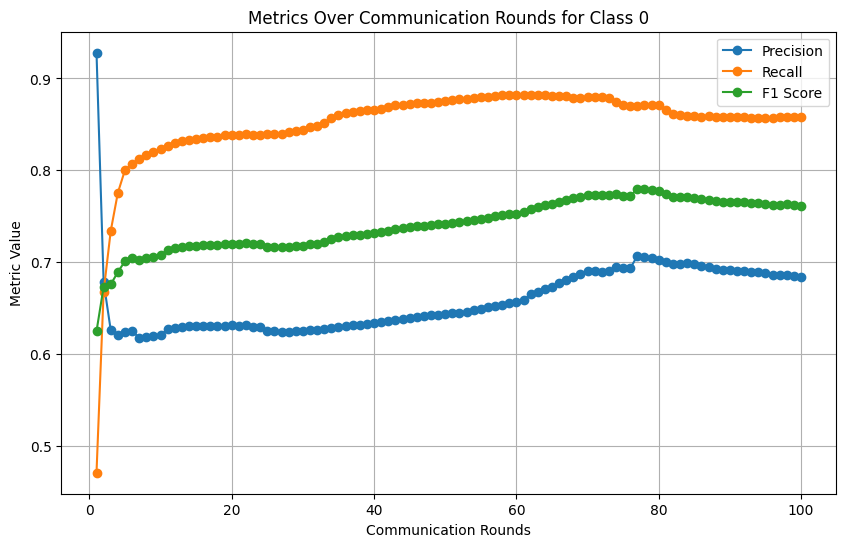

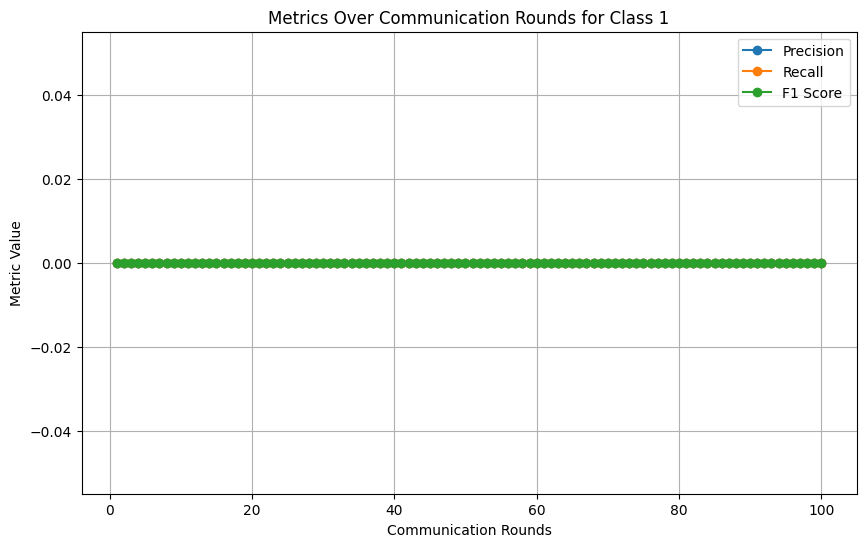

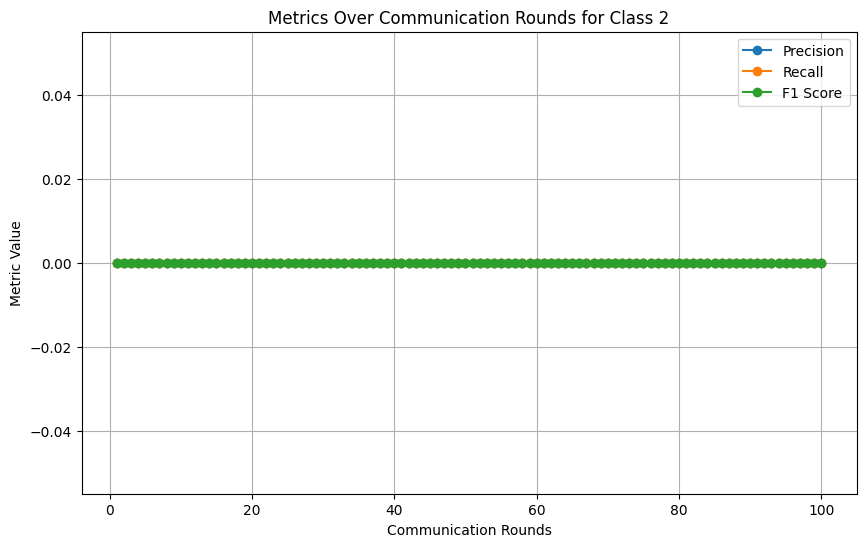

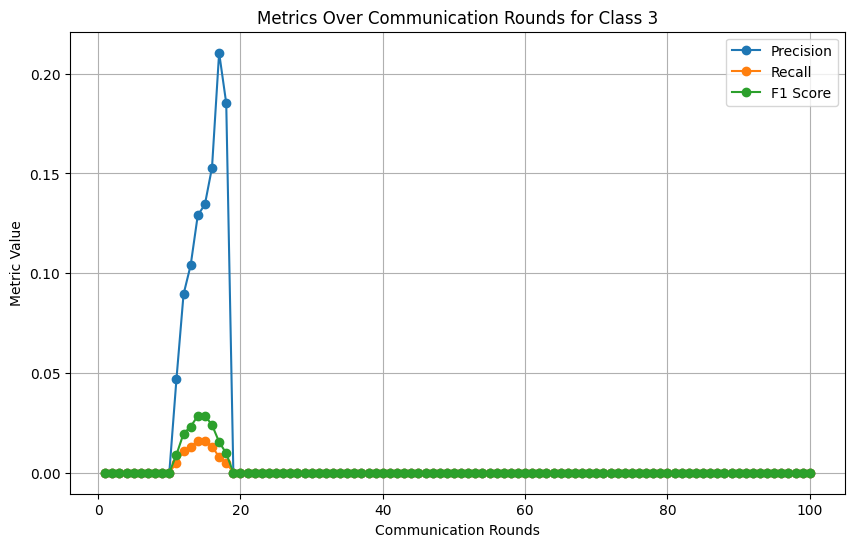

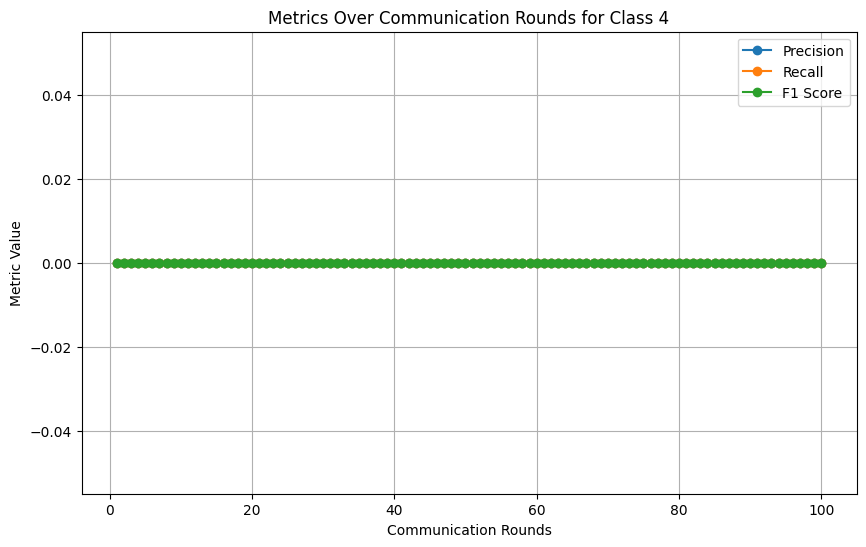

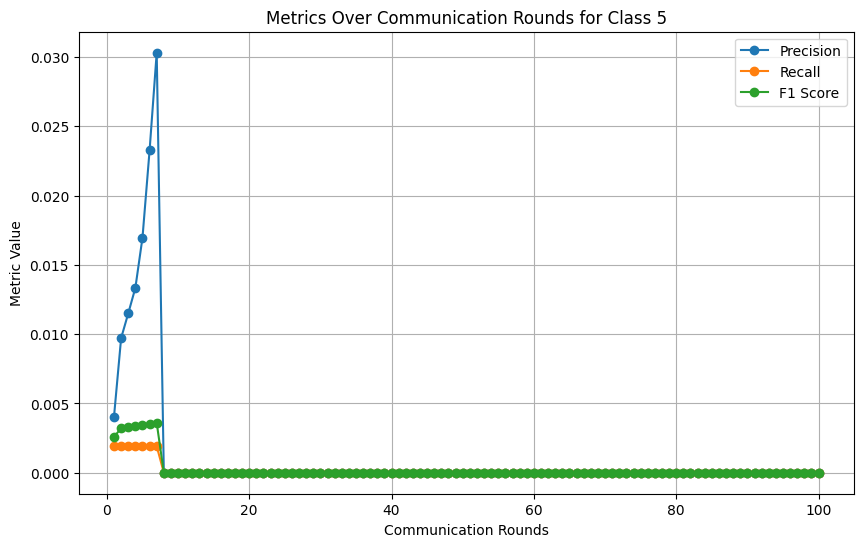

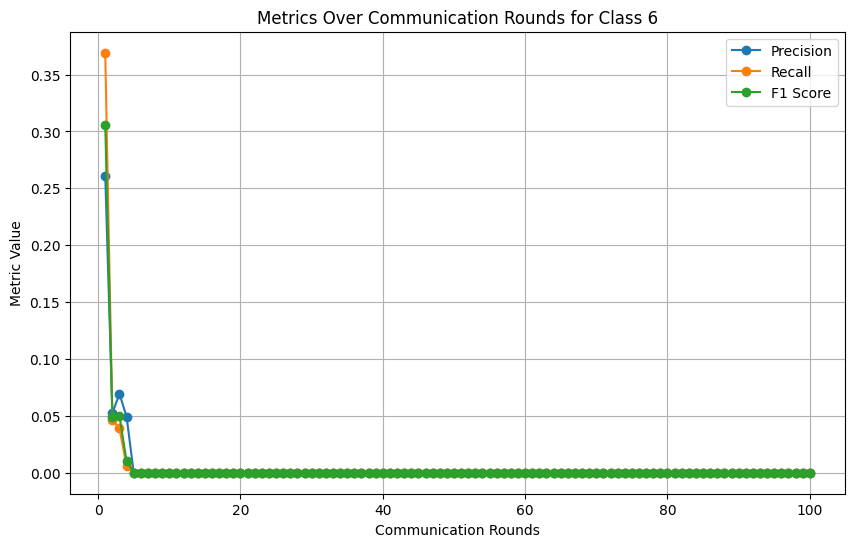

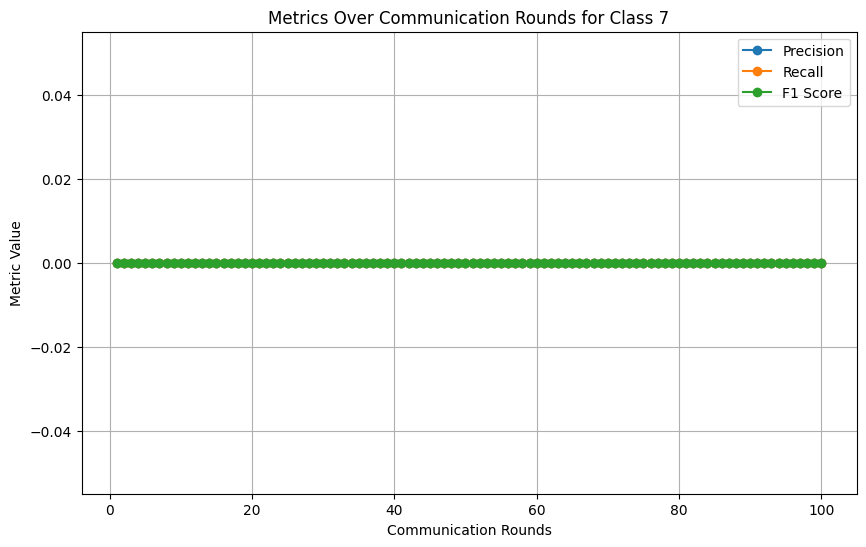

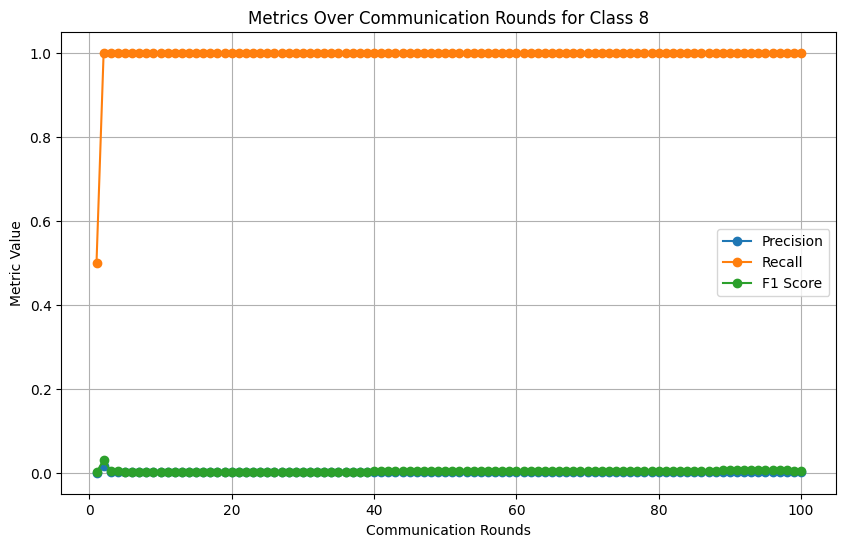

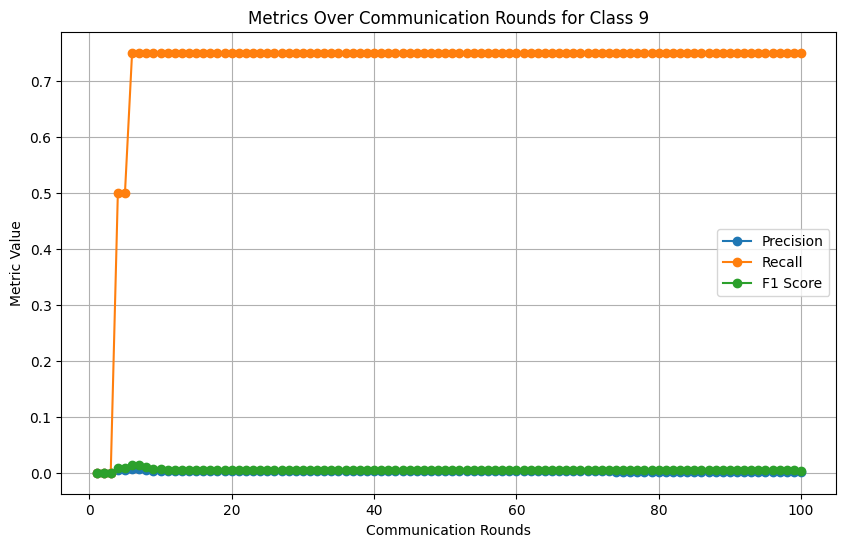

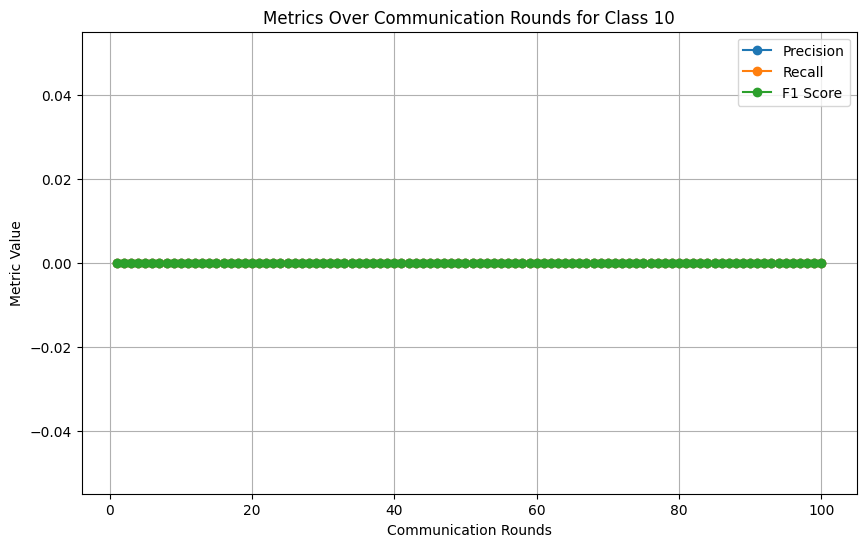

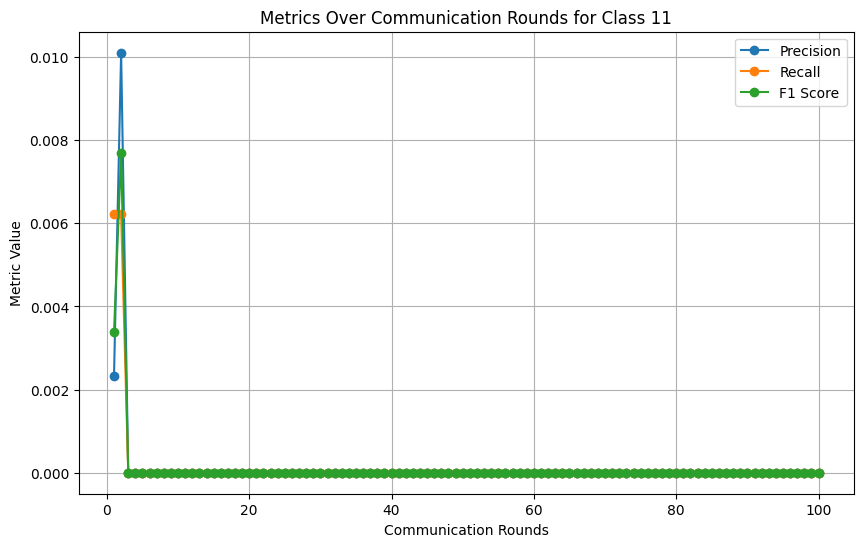

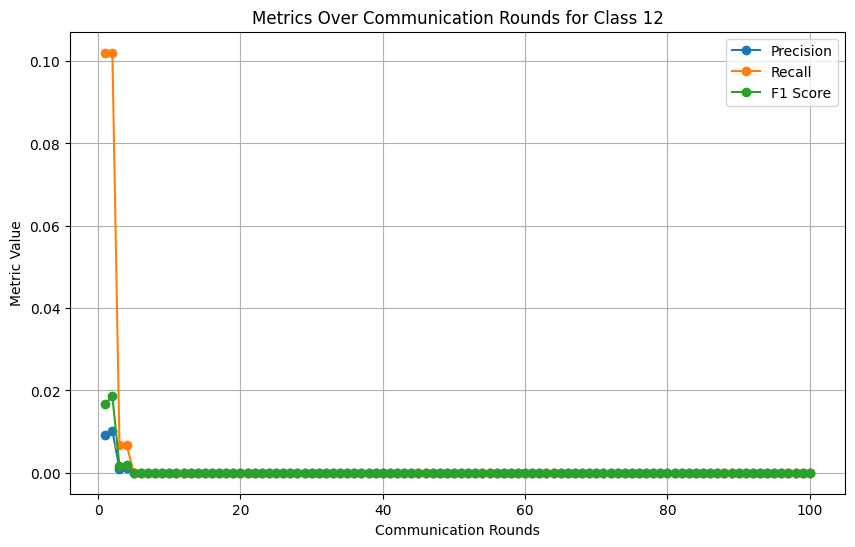

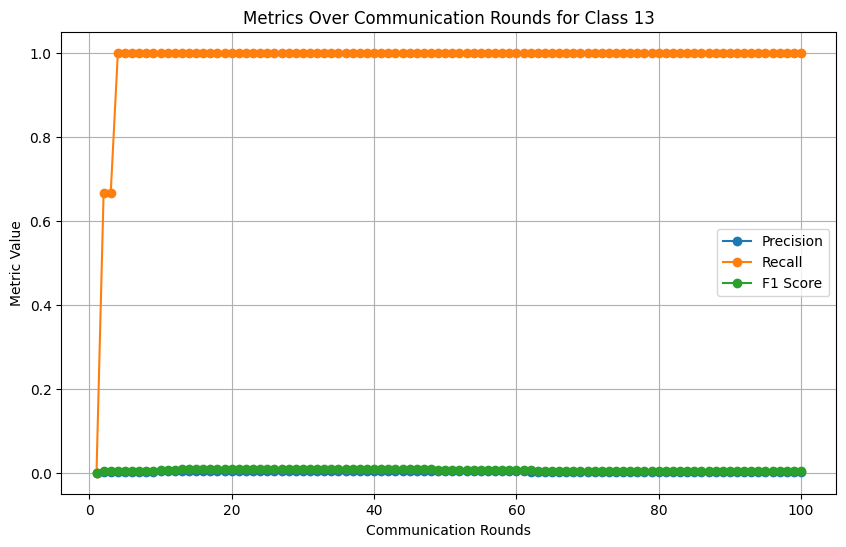

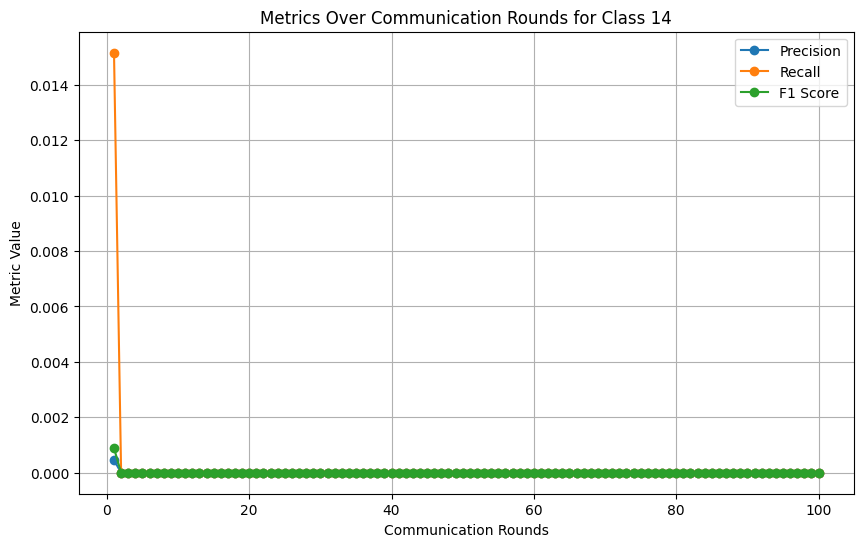

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the saved metrics
accuracy_per_class_over_rounds = np.load("accuracy_per_class_over_rounds.npy")
precision_per_class_over_rounds = np.load("precision_per_class_over_rounds.npy")
recall_per_class_over_rounds = np.load("recall_per_class_over_rounds.npy")
f1_per_class_over_rounds = np.load("f1_per_class_over_rounds.npy")
round_numbers = np.load("round_numbers.npy")

# Determine the number of classes
num_classes = accuracy_per_class_over_rounds.shape[1]

# Create a directory to save the images
output_dir = "metrics_plots"
os.makedirs(output_dir, exist_ok=True)

# Plot the metrics for each class and save the plots
for class_idx in range(num_classes):
    plt.figure(figsize=(10, 6))
    
    # Plot accuracy per class
    # plt.plot(round_numbers, accuracy_per_class_over_rounds[:, class_idx], label='Accuracy', marker='o')
    
    # Plot precision per class
    plt.plot(round_numbers, precision_per_class_over_rounds[:, class_idx], label='Precision', marker='o')
    
    # Plot recall per class
    plt.plot(round_numbers, recall_per_class_over_rounds[:, class_idx], label='Recall', marker='o')
    
    # Plot F1 score per class
    plt.plot(round_numbers, f1_per_class_over_rounds[:, class_idx], label='F1 Score', marker='o')
    
    plt.xlabel('Communication Rounds')
    plt.ylabel('Metric Value')
    plt.title(f'Metrics Over Communication Rounds for Class {class_idx}')
    plt.legend()
    plt.grid(True)
    
    # Save the figure
    output_path = os.path.join(output_dir, f'class_{class_idx}_metrics.png')
    plt.savefig(output_path)
    
    # Show the plot
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved metrics
accuracy_per_class_over_rounds = np.load("accuracy_per_class_over_rounds.npy")
precision_per_class_over_rounds = np.load("precision_per_class_over_rounds.npy")
recall_per_class_over_rounds = np.load("recall_per_class_over_rounds.npy")
f1_per_class_over_rounds = np.load("f1_per_class_over_rounds.npy")
round_numbers = np.load("round_numbers.npy")

# Determine the number of classes
num_classes = accuracy_per_class_over_rounds.shape[1]

# Plot the metrics for each class
for class_idx in range(num_classes):
    plt.figure(figsize=(10, 6))
    
    # Plot accuracy per class
    plt.plot(round_numbers, accuracy_per_class_over_rounds[:, class_idx], label='Accuracy', marker='o')
    
    # Plot precision per class
    plt.plot(round_numbers, precision_per_class_over_rounds[:, class_idx], label='Precision', marker='o')
    
    # Plot recall per class
    plt.plot(round_numbers, recall_per_class_over_rounds[:, class_idx], label='Recall', marker='o')
    
    # Plot F1 score per class
    plt.plot(round_numbers, f1_per_class_over_rounds[:, class_idx], label='F1 Score', marker='o')
    
    plt.xlabel('Communication Rounds')
    plt.ylabel('Metric Value')
    plt.title(f'Metrics Over Communication Rounds for Class {class_idx}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
accuracy_per_class_over_rounds.shape

In [ ]:
import numpy as np
sum = 0
for x in range(9):
    sum += (len(x_data[x]))
    print(len(x_data[x]))

print(sum)

In [ ]:
import numpy as np
sum = 0
for x in range(9):
    sum += (len(x_data[x]))
    print(len(x_data[x]))

print(sum)

In [ ]:
import numpy as np
sum = 0

uni = []

for x in range(9):
    sum += (len(y_data[x]))
    uni.append(y_data[x].unique())
    print(len(y_data[x]))

print(sum)

st = set()

for u in uni:
    for s in u:
        st.add(s)

print(st)

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [ ]:
from collections import Counter

p_all_node_list = []
# Here malicious nodes are 3,5,7
malicious_nodes = [3, 5, 7]
for index in range(len(y_data)):
    counter_num = Counter(y_data[index])
    total_sample = len(y_data[index])
    try:
        benign_sample = counter_num[0]
    except:
        p_all_node_list.append(0)
        continue
    malicious_sample = total_sample - benign_sample
    p_node = malicious_sample / benign_sample
    p_all_node_list.append(p_node)

q_all_list_node = softmax(p_all_node_list)
print(q_all_list_node)

In [ ]:
def sample_data(X_train, y_train, benign_label=0, sample_size=10000):
    # Convert X_train and y_train to a single DataFrame for easier manipulation
    df = pd.DataFrame(X_train)
    df['Label'] = y_train

    sampled_dfs = []
    benign_samples_needed = 0

    # Get the list of unique labels
    labels = df['Label'].unique()

    print(labels)

    for label in labels:
        if label != benign_label:
            label_df = df[df['Label'] == label]
            print(label, len(label_df))
            num_samples = min(len(label_df), sample_size)
            sampled_df = label_df.sample(n=num_samples, random_state=42)
            sampled_dfs.append(sampled_df)
            benign_samples_needed += num_samples


    benign_df = df[df['Label'] == benign_label]
    if len(benign_df) >= benign_samples_needed:
        benign_sampled_df = benign_df.sample(n=benign_samples_needed, random_state=42)
    else:
        benign_sampled_df = benign_df  # If not enough samples, take all

    sampled_dfs.append(benign_sampled_df)

    # Combine all the sampled dataframes
    final_df = pd.concat(sampled_dfs, ignore_index=True)

    # Separate the features and labels again
    X_sampled = final_df.drop(columns=['Label']).to_numpy()
    y_sampled = final_df['Label'].to_numpy()

    return X_sampled, y_sampled

In [ ]:
import load_data
x_data1, x_valid1, y_data1, y_valid1 = load_data.load_cicids_2017_q()

In [ ]:
x_data1

In [ ]:
from collections import Counter

Counter(y_data1)

In [ ]:
len(x_data1)